In [1]:
import pandas as pd, numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ld_data = pd.read_csv("/content/Leads.csv")
ld_data.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [5]:
ld_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
ld_data.shape


(9240, 37)

# EDA

In [7]:
ld_data.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
round(100*(ld_data.isnull().sum()/len(ld_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
##dropping lead quality with >50 nulls
ld_data= ld_data.dropna(thresh = ld_data.shape[0]*0.5, how="all", axis=1) ### dropping columns with more than 50 % NaNs

In [10]:
round(100*(ld_data.isnull().sum()/len(ld_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
ld_data["Lead Source"].describe()

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [12]:
ld_data["Lead Source"].fillna("Google")



0           Olark Chat
1       Organic Search
2       Direct Traffic
3       Direct Traffic
4               Google
             ...      
9235    Direct Traffic
9236    Direct Traffic
9237    Direct Traffic
9238            Google
9239    Direct Traffic
Name: Lead Source, Length: 9240, dtype: object

In [13]:
ld_data["Lead Source"]= ld_data["Lead Source"].fillna("Google")

In [14]:
ld_data["Lead Source"].describe() #### Filling NA with Mode i.e Google 

count       9240
unique        21
top       Google
freq        2904
Name: Lead Source, dtype: object

In [15]:
###NaN Handling
ld_data =ld_data.replace([" ", "XNA", "NULL", "NA"], np.nan)



In [16]:
ld_data["TotalVisits"].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [17]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import itertools as it

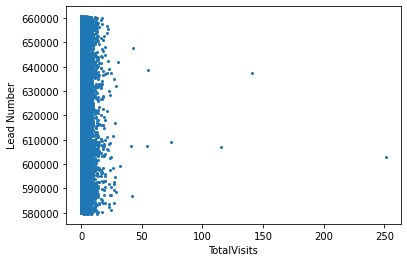

In [18]:

ld_data.plot.scatter(y ="Lead Number", x = "TotalVisits" , s = 4)



In [19]:
####Outliers in TotalVisits ( can be a case of clickjacking ), enlisitng all visits greater than 50 )

ld_data["TotalVisits"].unique()
ld_data[ld_data["TotalVisits"]<300].mean()


ld_data["TotalVisits"]= ld_data["TotalVisits"].fillna("3")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [20]:
ld_data["TotalVisits"].isnull().sum()



0

In [21]:
ld_data["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

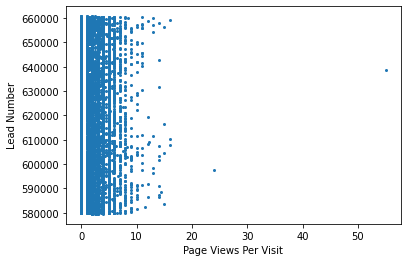

In [22]:
ld_data.plot.scatter(y ="Lead Number", x = "Page Views Per Visit" , s = 4)



In [23]:
##Handling Outliers in Page Views Per Visit - greater than 20 Visits - Abnormal 

ld_data[ld_data["Page Views Per Visit"]<20].mean()

###observed mean for normal range values = 2.354659


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Lead Number                    617027.501813
Converted                           0.380178
TotalVisits                         3.437315
Total Time Spent on Website       481.255466
Page Views Per Visit                2.354659
Asymmetrique Activity Score        14.314349
Asymmetrique Profile Score         16.337252
dtype: float64

In [24]:
ld_data["Page Views Per Visit"].mean()



2.3628199494672093

In [25]:
ld_data["Page Views Per Visit"]= ld_data["Page Views Per Visit"].fillna("2.35")

In [26]:
ld_data["Page Views Per Visit"].isnull().sum()



0

In [27]:
ld_data["Last Activity"]= ld_data["Last Activity"].fillna("Email Opened") ##filled with mode 

In [28]:
ld_data["Last Activity"].isnull().sum()

0

In [29]:
ld_data["Country"].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [30]:
ld_data["Country"]= ld_data["Country"].fillna("India") ##filled with mode 

In [31]:
ld_data["Country"].isnull().sum()

0

In [32]:
ld_data["Specialization"].describe() ####Mode value is Select , most leads have not specified the specialization

count       7802
unique        19
top       Select
freq        1942
Name: Specialization, dtype: object

In [33]:
ld_data["Specialization"]=ld_data["Specialization"].fillna("Select")

In [34]:
ld_data["Specialization"].isnull().sum()

0

In [35]:
ld_data["How did you hear about X Education"].describe() ####Filling NA with Select

count       7033
unique        10
top       Select
freq        5043
Name: How did you hear about X Education, dtype: object

In [36]:
ld_data["How did you hear about X Education"]=ld_data["How did you hear about X Education"].fillna("Select")

In [37]:
ld_data["What is your current occupation"].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

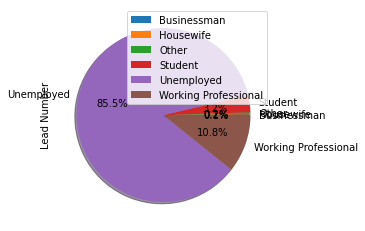

In [38]:
ld_data.groupby(["What is your current occupation"]).sum().plot(kind="pie", y="Lead Number" , autopct="%1.1f%%", shadow= True)

In [39]:
ld_data["What is your current occupation"]=ld_data["What is your current occupation"].fillna("Unemployed")

In [40]:
ld_data["How did you hear about X Education"].describe()

count       9240
unique        10
top       Select
freq        7250
Name: How did you hear about X Education, dtype: object

In [41]:
ld_data["How did you hear about X Education"]=ld_data["How did you hear about X Education"].fillna("Select")

In [42]:
ld_data["How did you hear about X Education"].isnull().sum()

0

In [43]:
ld_data["What matters most to you in choosing a course"].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [44]:
ld_data["What matters most to you in choosing a course"]=ld_data["What matters most to you in choosing a course"].fillna("Better Career Prospects")

In [45]:
ld_data["What matters most to you in choosing a course"].isnull().sum()

0

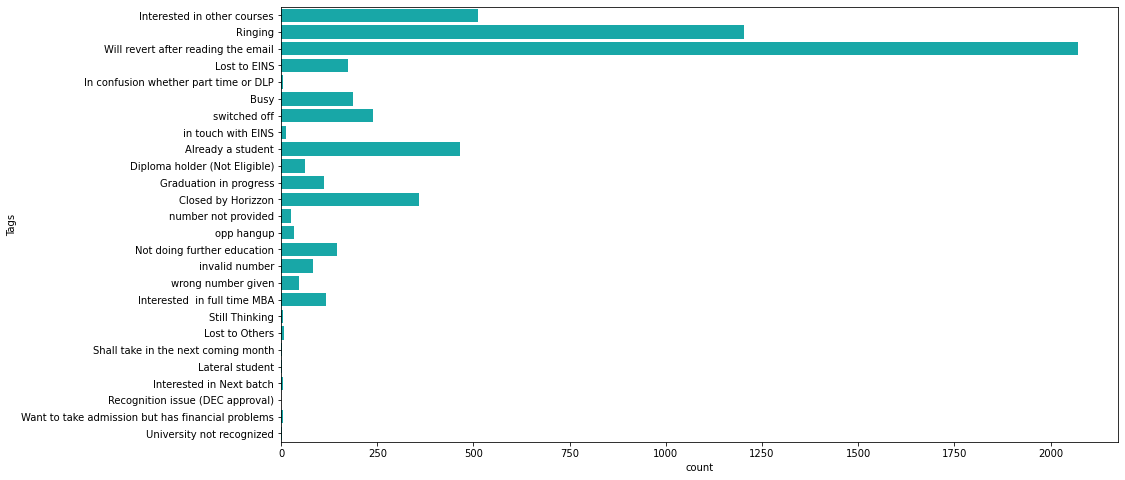

In [46]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(y="Tags", data=ld_data, color="c")

In [47]:
ld_data["Tags"]=ld_data["Tags"].fillna("Will revert after reading the email")

In [48]:
ld_data["Tags"].isnull().sum()

0

In [49]:
ld_data["City"].describe()

count       7820
unique         7
top       Mumbai
freq        3222
Name: City, dtype: object

In [50]:
ld_data["City"].unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

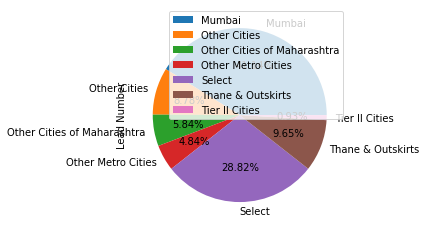

In [51]:
ld_data.groupby(["City"]).sum().plot(kind="pie", y="Lead Number" , autopct="%2.2f%%")
plt.show()

In [52]:
ld_data["City"]=ld_data["City"].fillna("Mumbai")

In [53]:
ld_data["Lead Profile"].describe()

count       6531
unique         6
top       Select
freq        4146
Name: Lead Profile, dtype: object

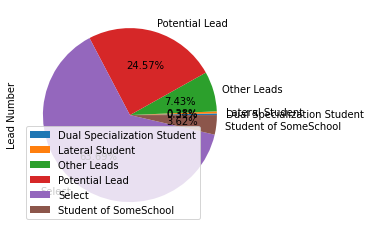

In [54]:
ld_data.groupby(["Lead Profile"]).sum().plot(kind="pie", y="Lead Number" , autopct="%2.2f%%")
plt.show()

In [55]:
ld_data["Lead Profile"]=ld_data["Lead Profile"].fillna("Select")

In [56]:
ld_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

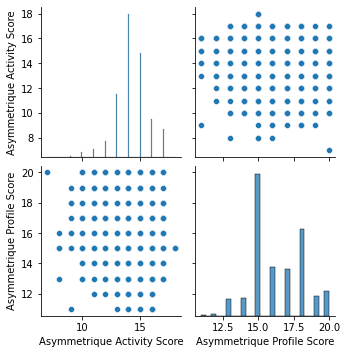

In [57]:
sns.pairplot(ld_data[["Asymmetrique Activity Index" ,"Asymmetrique Profile Index",
"Asymmetrique Activity Score","Asymmetrique Profile Score"]] , markers=["o", "s", "D"])


In [58]:
ld_data[["Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score "]].describe()

KeyError: ignored

# Categorical Data Handling




In [59]:
ld_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   object 
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [ ]:
ld_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [60]:
##HANDLING BINARY VARS
varlist =  ['Do Not Email', 'Do Not Call', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
ld_data[varlist] = ld_data[varlist].apply(binary_map)

In [ ]:
ld_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   object 
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [ ]:
###. numerical clmns : TotalVisits	Total Time Spent on Website	Page Views Per Visit Asymmetrique Activity Score	Asymmetrique Profile Score

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [61]:
ld_data.select_dtypes(object).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Origin                                    9240 non-null   object
 2   Lead Source                                    9240 non-null   object
 3   TotalVisits                                    9240 non-null   object
 4   Page Views Per Visit                           9240 non-null   object
 5   Last Activity                                  9240 non-null   object
 6   Country                                        9240 non-null   object
 7   Specialization                                 9240 non-null   object
 8   How did you hear about X Education             9240 non-null   object
 9   What is your current occupation                9240 non-null   

In [62]:
pd.set_option("display.max_columns",None)

In [ ]:
ld_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [63]:
dum1 = pd.get_dummies(ld_data[["Lead Origin","Lead Source","Last Activity","Country","Specialization","How did you hear about X Education","What is your current occupation","What matters most to you in choosing a course","Tags","Lead Profile","City","Asymmetrique Activity Index","Asymmetrique Profile Index","Last Notable Activity"]],drop_first =True)


In [64]:
ld_data= pd.concat([ld_data,dum1],axis=1)

In [65]:
ld_data.shape

(9240, 202)

In [66]:
ld_data=ld_data.drop(["Lead Origin","Lead Source","Last Activity","Country","Specialization","How did you hear about X Education","What is your current occupation","What matters most to you in choosing a course","Tags","Lead Profile","City","Asymmetrique Activity Index","Asymmetrique Profile Index","Last Notable Activity"],axis=1)



In [ ]:
ld_data.shape

(9240, 188)

In [67]:
ld_data.head(4)

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the ne

In [68]:
####dropping any duplicate columns 
ld_data=ld_data.T.drop_duplicates().T


In [ ]:
ld_data.head(4)

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial p

In [69]:
ld_data.shape

(9240, 183)

In [70]:
###handling binary yes no categories variables 

varlist1 =  ["Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations"]
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the ld_data list
ld_data[varlist1] = ld_data[varlist1].apply(binary_map)

In [71]:
ld_data.head(4)

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial p

In [78]:
ld_data = ld_data.drop("Prospect ID",axis=1)

In [79]:
ld_data=ld_data.astype(float)

In [ ]:
####DATA ONLY HAS NUMERIC VALUES --- PROSPECT ID COLUMN IS OF LESS RELEVANCE 


In [80]:
from sklearn.model_selection import train_test_split

In [106]:

X = ld_data.drop(["Lead Number","Converted"], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after rea

In [107]:
#Putting response variable to y
y = ld_data['Converted']

y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Converted, dtype: float64

In [108]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#FEATURE SCALING 

In [84]:
from sklearn.preprocessing import StandardScaler

In [109]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after rea

In [ ]:
pd.set_option("display.max_rows",None)

In [110]:
ld_data.isna().sum()

Lead Number                                                                0
Do Not Email                                                               0
Do Not Call                                                                0
Converted                                                                  0
TotalVisits                                                                0
Total Time Spent on Website                                                0
Page Views Per Visit                                                       0
Search                                                                     0
Magazine                                                                   0
Newspaper Article                                                          0
X Education Forums                                                         0
Newspaper                                                                  0
Digital Advertisement                                                      0

In [86]:
#####Handling missing nulls to avoid error in scaling
ld_data[["Asymmetrique Activity Score","Asymmetrique Profile Score"]].mean()

Asymmetrique Activity Score    14.306252
Asymmetrique Profile Score     16.344883
dtype: float64

In [104]:
ld_data["Asymmetrique Activity Score"] =ld_data["Asymmetrique Activity Score"].fillna(14.3)

In [105]:
ld_data["Asymmetrique Profile Score"] =ld_data["Asymmetrique Profile Score"].fillna(16.3)

In [111]:
###....Scaled Training Set X_train 

###Conversion Rate -----> 38.5 Percent Conversion Rate

CR =(sum(ld_data['Converted'])/len(ld_data['Converted'].index))*100
CR

38.53896103896104

In [90]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Model Building 

In [91]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [112]:

logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/famil

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6297
Model Family:                Binomial   Df Model:                          170
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 12 Jun 2022   Deviance:                          nan
Time:                        09:08:01   Pearson chi2:                 3.38e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    1.664e+14   7.24e+07    2.3e+06      0.000    1.66e+14    1.66e+14
Do Not Email                                                            -1.413e+14   4.51e+06  -3.13e+07      0.000   -1.41e+14   -1.41e+14
Do Not Call                                                              3.122e+16   4.79e+07   6.52e+08      0.000    3.12e+16    3.12e+16
TotalVisits                                                              5.797e+13      1e+06   5.77e+07      0.000     5.8e+13     5.8e+13
Total Time Spent on Website                                              3.108e+14   9.97e+05   3.12e+08      0.000    3.11e+14    3.11e+14
Page Views Per Visit                                                     -4.44e+13   1.21e+06  -3.68e+07      0.000   -4.44e+13   -4.44e+13
Search                                                                   6.418e+14   2.22e+07    2.9e+07      0.000    6.42e+14    6.42e+14
Magazine                                                                  -42.8265      1e-06  -4.28e+07      0.000     -42.827     -42.827
Newspaper Article                                                        3.503e+15   6.75e+07   5.19e+07      0.000     3.5e+15     3.5e+15
X Education Forums                                                      -4.096e+15   1.12e+08  -3.65e+07      0.000    -4.1e+15    -4.1e+15
Newspaper                                                               -4.256e+15   6.74e+07  -6.31e+07      0.000   -4.26e+15   -4.26e+15
Digital Advertisement                                                   -2.065e+15   4.83e+07  -4.28e+07      0.000   -2.07e+15   -2.07e+15
Through Recommendations                                                  3.952e+14   2.87e+07   1.38e+07      0.000    3.95e+14    3.95e+14
Get updates on DM Content                                                 171.3920   1.75e-06   9.78e+07      0.000     171.392     171.392
Asymmetrique Activity Score                                               2.67e+14   1.46e+06   1.83e+08      0.000    2.67e+14    2.67e+14
Asymmetrique Profile Score                                              -1.232e+14   2.06e+06  -5.98e+07      0.000   -1.23e+14   -1.23e+14
A free copy of Mastering The Interview                                   -1.37e+13   3.37e+06  -4.07e+06      0.000   -1.37e+13   -1.37e+13
Lead Origin_Landing Page Submission                                     -1.777e+14    4.3e+06  -4.14e+07      0.000   -1.78e+14   -1.78e+14
Lead Origin_Lead Add Form                                                1.814e+14   1.31e+07   1.39e+07      0.000    1.81e+14    1.81e+14
Lea

In [102]:
pd.set_option("display.max_rows",1000)

In [113]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [115]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [116]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False,  True, False, False,  True, False,  True,  True,  True,
       False, False,  True, False,  True, False,  True, False,  True,
       False,  True, False, False, False, False,  True, False, False,
        True, False, False, False,  True,  True,  True, False, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True, False,  True, False, False, False, False, False, False,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False,  True, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False,  True, False,
        True, False, False, False,  True,  True, False, False,  True,
       False,  True,  True, False, False, False,  True,  True,  True,
       False, False,  True,  True, False, False, False,  True,  True,
        True, False, False,  True, False, False,  True,  True, False,
       False,  True,

In [117]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 12),
 ('TotalVisits', False, 31),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('Search', False, 8),
 ('Magazine', False, 84),
 ('Newspaper Article', False, 73),
 ('X Education Forums', False, 21),
 ('Newspaper', False, 40),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 45),
 ('Get updates on DM Content', False, 83),
 ('Asymmetrique Activity Score', True, 1),
 ('Asymmetrique Profile Score', False, 3),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 46),
 ('Lead Origin_Quick Add Form', False, 35),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 56),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 65),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', False, 47),
 ('Lead Source_Organi

In [118]:
col = X_train.columns[rfe.support_]

In [119]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Through Recommendations', 'Get updates on DM Content',
       'Asymmetrique Profile Score', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Resubscribed to emails',
       'Last Activity_Visited Booth in Tradeshow', 'Country_Bahrain',
       'Country_Bangladesh', 'Country_

Model Assesment 

In [120]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6377
Model Family:                Binomial   Df Model:                           90
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1231.3
Date:                Sun, 12 Jun 2022   Deviance:                       2462.6
Time:                        09:14:06   Pearson chi2:                 2.91e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     19.5797   4.51e+04      0.000      1.000   -8.84e+04    8.84e+04
Do Not Email                                              -0.7237      0.316     -2.294      0.022      -1.342      -0.105
Total Time Spent on Website                                1.1028      0.061     17.962      0.000       0.982       1.223
Digital Advertisement                                    -23.5628   1.18e+05     -0.000      1.000   -2.31e+05    2.31e+05
Asymmetrique Activity Score                                0.9066      0.090     10.055      0.000       0.730       1.083
A free copy of Mastering The Interview                     0.3520      0.213      1.655      0.098      -0.065       0.769
Lead Origin_Landing Page Submission                       -0.6773      0.255     -2.661      0.008      -1.176      -0.178
Lead Origin_Lead Add Form                                  0.7136      0.334      2.139      0.032       0.060       1.367
Lead Source_Direct Traffic                                -0.3799      0.233     -1.633      0.103      -0.836       0.076
Lead Source_Google                                        -0.3248      0.181     -1.792      0.073      -0.680       0.030
Lead Source_NC_EDM                                        24.6991   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Organic Search                                -0.3886      0.222     -1.753      0.080      -0.823       0.046
Lead Source_Press_Release                                -24.7584   1.17e+05     -0.000      1.000   -2.28e+05    2.28e+05
Lead Source_Welingak Website                               2.2837      0.819      2.790      0.005       0.679       3.888
Lead Source_google                                       -22.7473   9.41e+04     -0.000      1.000   -1.84e+05    1.84e+05
Last Activity_Converted to Lead                           -0.7349      0.389     -1.891      0.059      -1.497       0.027
Last Activity_Email Bounced                               -1.3215      0.598     -2.210      0.027      -2.493      -0.150
Last Activity_Email Link Clicked                           1.3498      0.557      2.424      0.015       0.258       2.441
Last Activity_Had a Phone Conversation                     0.1907      1.112      0.171      0.864      -1.989       2.371
Last Activity_Olark Chat Conversation                     -1.1002      0.317     -3.471      0.001      -1.722      -0.479
Last Activity_Page Visited on Website                     -0.5828      0.244     -2.393      0.017      -1.060      -0.105
Last Activity_SMS Sent                                     0.9229      0.263      3.511      0.000       0.408       1.438
Last Act

In [121]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.015016
6795    0.140704
3516    0.004555
8105    0.048356
3934    0.282349
4844    0.999754
3297    0.001151
8071    0.999927
987     0.148835
7423    0.999692
dtype: float64

In [122]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01501593, 0.14070404, 0.00455541, 0.04835632, 0.28234923,
       0.99975399, 0.00115096, 0.99992702, 0.14883506, 0.99969158])

ACTUAL VS PREDICTED PROBABILITIES

In [123]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prb':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prb
0,0.0,0.015016
1,0.0,0.140704
2,0.0,0.004555
3,0.0,0.048356
4,0.0,0.282349


In [124]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prb.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prb,predicted
0,0.0,0.015016,0
1,0.0,0.140704,0
2,0.0,0.004555,0
3,0.0,0.048356,0
4,0.0,0.282349,0


In [125]:
from sklearn import metrics

In [127]:

confusion = metrics.confusion_matrix(y_train_pred_final.Converted , y_train_pred_final.predicted )
print(confusion)

[[3815  187]
 [ 247 2219]]


###Predicted   **Not_converted Converted**
## actual 
#not converted  3815  187
#converted     247 2219  

In [129]:
#ACCURACY

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9329004329004329


In [136]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [137]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
74,Lead Profile_Select,104.49
28,Country_India,82.45
50,What is your current occupation_Unemployed,41.53
73,Lead Profile_Potential Lead,24.79
65,Tags_Will revert after reading the email,18.80
47,How did you hear about X Education_Select,14.82
5,Lead Origin_Landing Page Submission,12.68
20,Last Activity_SMS Sent,7.93
72,Lead Profile_Other Leads,7.88
89,Last Notable Activity_SMS Sent,7.77


In [138]:
col = col.drop('Lead Profile_Select', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Digital Advertisement',
       'Asymmetrique Activity Score', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Press_Release', 'Lead Source_Welingak Website',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked', 'Country_Australia',
       'Country_France', 'Country_Germany', 'Country_Hong Kong',
       'Country_India', 'Country_Nigeria', 'Country_Qatar', 'Count

In [139]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6378
Model Family:                Binomial   Df Model:                           89
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1237.5
Date:                Sun, 12 Jun 2022   Deviance:                       2474.9
Time:                        11:08:36   Pearson chi2:                 2.91e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -5.2955      0.880     -6.016      0.000      -7.021      -3.570
Do Not Email                                              -0.6885      0.313     -2.199      0.028      -1.302      -0.075
Total Time Spent on Website                                1.1050      0.061     18.023      0.000       0.985       1.225
Digital Advertisement                                    -23.5650   1.18e+05     -0.000      1.000   -2.31e+05    2.31e+05
Asymmetrique Activity Score                                0.9061      0.090     10.077      0.000       0.730       1.082
A free copy of Mastering The Interview                     0.3466      0.212      1.633      0.102      -0.069       0.763
Lead Origin_Landing Page Submission                       -0.6849      0.254     -2.697      0.007      -1.183      -0.187
Lead Origin_Lead Add Form                                  0.6949      0.333      2.084      0.037       0.041       1.348
Lead Source_Direct Traffic                                -0.3751      0.232     -1.618      0.106      -0.829       0.079
Lead Source_Google                                        -0.3207      0.181     -1.773      0.076      -0.675       0.034
Lead Source_NC_EDM                                        24.7062   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Organic Search                                -0.3731      0.221     -1.688      0.091      -0.806       0.060
Lead Source_Press_Release                                -24.7617   1.16e+05     -0.000      1.000   -2.28e+05    2.28e+05
Lead Source_Welingak Website                               2.2886      0.819      2.793      0.005       0.683       3.894
Lead Source_google                                       -22.7405   9.41e+04     -0.000      1.000   -1.84e+05    1.84e+05
Last Activity_Converted to Lead                           -0.7644      0.389     -1.965      0.049      -1.527      -0.002
Last Activity_Email Bounced                               -1.3765      0.596     -2.310      0.021      -2.544      -0.209
Last Activity_Email Link Clicked                           1.3270      0.556      2.386      0.017       0.237       2.417
Last Activity_Had a Phone Conversation                     0.1464      1.113      0.132      0.895      -2.036       2.329
Last Activity_Olark Chat Conversation                     -1.1163      0.316     -3.531      0.000      -1.736      -0.497
Last Activity_Page Visited on Website                     -0.6051      0.243     -2.487      0.013      -1.082      -0.128
Last Activity_SMS Sent                                     0.8878      0.262      3.388      0.001       0.374       1.401
Last Act

In [140]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [141]:
y_train_pred_final['Converted_Prb'] = y_train_pred

In [142]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prb.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prb,predicted
0,0.0,0.015376,0
1,0.0,0.140566,0
2,0.0,0.004563,0
3,0.0,0.048460,0
4,0.0,0.285904,0


In [143]:

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9322820037105751


In [144]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,Country_India,50.43
50,What is your current occupation_Unemployed,35.14
65,Tags_Will revert after reading the email,17.38
47,How did you hear about X Education_Select,14.28
5,Lead Origin_Landing Page Submission,11.92
20,Last Activity_SMS Sent,7.93
88,Last Notable Activity_SMS Sent,7.76
43,Specialization_Select,6.25
7,Lead Source_Direct Traffic,5.63
4,A free copy of Mastering The Interview,4.77


In [145]:
col = col.drop("Country_India")
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Digital Advertisement',
       'Asymmetrique Activity Score', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Press_Release', 'Lead Source_Welingak Website',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked', 'Country_Australia',
       'Country_France', 'Country_Germany', 'Country_Hong Kong',
       'Country_Nigeria', 'Country_Qatar', 'Country_Russia',
     

In [146]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6379
Model Family:                Binomial   Df Model:                           88
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1237.7
Date:                Sun, 12 Jun 2022   Deviance:                       2475.3
Time:                        11:12:32   Pearson chi2:                 2.93e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -4.9486      0.690     -7.168      0.000      -6.302      -3.596
Do Not Email                                              -0.6932      0.313     -2.216      0.027      -1.306      -0.080
Total Time Spent on Website                                1.1048      0.061     18.022      0.000       0.985       1.225
Digital Advertisement                                    -23.5503   1.18e+05     -0.000      1.000   -2.31e+05    2.31e+05
Asymmetrique Activity Score                                0.9040      0.090     10.063      0.000       0.728       1.080
A free copy of Mastering The Interview                     0.3432      0.212      1.619      0.106      -0.072       0.759
Lead Origin_Landing Page Submission                       -0.6792      0.254     -2.678      0.007      -1.176      -0.182
Lead Origin_Lead Add Form                                  0.6960      0.333      2.087      0.037       0.042       1.350
Lead Source_Direct Traffic                                -0.3832      0.231     -1.657      0.098      -0.837       0.070
Lead Source_Google                                        -0.3195      0.181     -1.768      0.077      -0.674       0.035
Lead Source_NC_EDM                                        24.7019   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Organic Search                                -0.3756      0.221     -1.700      0.089      -0.809       0.057
Lead Source_Press_Release                                -24.7564   1.16e+05     -0.000      1.000   -2.28e+05    2.28e+05
Lead Source_Welingak Website                               2.2891      0.819      2.793      0.005       0.683       3.895
Lead Source_google                                       -22.7374   9.41e+04     -0.000      1.000   -1.84e+05    1.84e+05
Last Activity_Converted to Lead                           -0.7711      0.390     -1.979      0.048      -1.535      -0.008
Last Activity_Email Bounced                               -1.3688      0.596     -2.298      0.022      -2.536      -0.201
Last Activity_Email Link Clicked                           1.3271      0.556      2.386      0.017       0.237       2.417
Last Activity_Had a Phone Conversation                     0.1508      1.114      0.135      0.892      -2.032       2.333
Last Activity_Olark Chat Conversation                     -1.1170      0.316     -3.533      0.000      -1.737      -0.497
Last Activity_Page Visited on Website                     -0.6102      0.243     -2.511      0.012      -1.086      -0.134
Last Activity_SMS Sent                                     0.8872      0.262      3.388      0.001       0.374       1.401
Last Act

In [147]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [148]:
y_train_pred_final['Converted_Prb'] = y_train_pred

In [150]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prb.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prb,predicted
0,0.0,0.015350,0
1,0.0,0.139084,0
2,0.0,0.004548,0
3,0.0,0.048581,0
4,0.0,0.286241,0


In [151]:

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9321273964131107


In [152]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
49,What is your current occupation_Unemployed,26.55
64,Tags_Will revert after reading the email,14.86
46,How did you hear about X Education_Select,13.71
5,Lead Origin_Landing Page Submission,11.00
20,Last Activity_SMS Sent,7.92
87,Last Notable Activity_SMS Sent,7.75
42,Specialization_Select,6.11
7,Lead Source_Direct Traffic,5.62
4,A free copy of Mastering The Interview,4.74
85,Last Notable Activity_Modified,4.44


In [153]:
col = col.drop("What is your current occupation_Unemployed")
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Digital Advertisement',
       'Asymmetrique Activity Score', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Press_Release', 'Lead Source_Welingak Website',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked', 'Country_Australia',
       'Country_France', 'Country_Germany', 'Country_Hong Kong',
       'Country_Nigeria', 'Country_Qatar', 'Country_Russia',
     

In [154]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6380
Model Family:                Binomial   Df Model:                           87
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1240.7
Date:                Sun, 12 Jun 2022   Deviance:                       2481.3
Time:                        11:15:19   Pearson chi2:                 2.91e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -5.8388      0.599     -9.756      0.000      -7.012      -4.666
Do Not Email                                              -0.6912      0.313     -2.208      0.027      -1.305      -0.078
Total Time Spent on Website                                1.1070      0.061     18.057      0.000       0.987       1.227
Digital Advertisement                                    -23.6105   1.18e+05     -0.000      1.000   -2.31e+05    2.31e+05
Asymmetrique Activity Score                                0.9043      0.090     10.073      0.000       0.728       1.080
A free copy of Mastering The Interview                     0.3019      0.211      1.433      0.152      -0.111       0.715
Lead Origin_Landing Page Submission                       -0.6572      0.253     -2.593      0.010      -1.154      -0.160
Lead Origin_Lead Add Form                                  0.7698      0.331      2.325      0.020       0.121       1.419
Lead Source_Direct Traffic                                -0.3699      0.231     -1.600      0.110      -0.823       0.083
Lead Source_Google                                        -0.3216      0.181     -1.780      0.075      -0.676       0.032
Lead Source_NC_EDM                                        24.6656   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Organic Search                                -0.3679      0.221     -1.667      0.096      -0.801       0.065
Lead Source_Press_Release                                -24.8306   1.18e+05     -0.000      1.000   -2.31e+05    2.31e+05
Lead Source_Welingak Website                               2.2206      0.819      2.711      0.007       0.615       3.826
Lead Source_google                                       -22.7348   9.39e+04     -0.000      1.000   -1.84e+05    1.84e+05
Last Activity_Converted to Lead                           -0.7610      0.387     -1.964      0.050      -1.520      -0.002
Last Activity_Email Bounced                               -1.4017      0.600     -2.336      0.019      -2.578      -0.226
Last Activity_Email Link Clicked                           1.3260      0.556      2.385      0.017       0.236       2.416
Last Activity_Had a Phone Conversation                     0.1388      1.113      0.125      0.901      -2.042       2.320
Last Activity_Olark Chat Conversation                     -1.1044      0.315     -3.509      0.000      -1.721      -0.487
Last Activity_Page Visited on Website                     -0.6116      0.243     -2.518      0.012      -1.088      -0.135
Last Activity_SMS Sent                                     0.8733      0.262      3.337      0.001       0.360       1.386
Last Act

In [155]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [156]:
y_train_pred_final['Converted_Prb'] = y_train_pred

In [157]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prb.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prb,predicted
0,0.0,0.015461,0
1,0.0,0.137650,0
2,0.0,0.004411,0
3,0.0,0.048757,0
4,0.0,0.284268,0


In [159]:

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9318181818181818


In [160]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
46,How did you hear about X Education_Select,13.01
5,Lead Origin_Landing Page Submission,10.01
63,Tags_Will revert after reading the email,9.62
20,Last Activity_SMS Sent,7.92
86,Last Notable Activity_SMS Sent,7.74
42,Specialization_Select,5.93
7,Lead Source_Direct Traffic,5.61
4,A free copy of Mastering The Interview,4.74
84,Last Notable Activity_Modified,4.41
8,Lead Source_Google,3.81


In [163]:
col = col.drop("How did you hear about X Education_Select",1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Digital Advertisement',
       'Asymmetrique Activity Score', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Press_Release', 'Lead Source_Welingak Website',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked', 'Country_Australia',
       'Country_France', 'Country_Germany', 'Country_Hong Kong',
       'Country_Nigeria', 'Country_Qatar', 'Country_Russia',
     

In [164]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6381
Model Family:                Binomial   Df Model:                           86
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1244.5
Date:                Sun, 12 Jun 2022   Deviance:                       2489.1
Time:                        11:18:16   Pearson chi2:                 2.85e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -6.1466      0.589    -10.436      0.000      -7.301      -4.992
Do Not Email                                              -0.7693      0.308     -2.498      0.012      -1.373      -0.166
Total Time Spent on Website                                1.1166      0.061     18.258      0.000       0.997       1.236
Digital Advertisement                                    -23.5581   1.18e+05     -0.000      1.000   -2.32e+05    2.32e+05
Asymmetrique Activity Score                                0.8999      0.090     10.042      0.000       0.724       1.076
A free copy of Mastering The Interview                    -0.0340      0.171     -0.199      0.842      -0.368       0.300
Lead Origin_Landing Page Submission                       -0.3911      0.236     -1.658      0.097      -0.853       0.071
Lead Origin_Lead Add Form                                  0.6828      0.331      2.063      0.039       0.034       1.332
Lead Source_Direct Traffic                                -0.4896      0.227     -2.156      0.031      -0.935      -0.045
Lead Source_Google                                        -0.2546      0.179     -1.426      0.154      -0.605       0.095
Lead Source_NC_EDM                                        24.7993   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Organic Search                                -0.4616      0.219     -2.111      0.035      -0.890      -0.033
Lead Source_Press_Release                                -24.8710   1.18e+05     -0.000      1.000   -2.31e+05    2.31e+05
Lead Source_Welingak Website                               2.3431      0.818      2.866      0.004       0.740       3.946
Lead Source_google                                       -22.7038   9.16e+04     -0.000      1.000   -1.79e+05    1.79e+05
Last Activity_Converted to Lead                           -0.8304      0.387     -2.147      0.032      -1.589      -0.072
Last Activity_Email Bounced                               -1.4137      0.596     -2.371      0.018      -2.582      -0.245
Last Activity_Email Link Clicked                           1.3368      0.546      2.450      0.014       0.267       2.406
Last Activity_Had a Phone Conversation                     0.0781      1.130      0.069      0.945      -2.137       2.293
Last Activity_Olark Chat Conversation                     -1.1199      0.314     -3.564      0.000      -1.736      -0.504
Last Activity_Page Visited on Website                     -0.6025      0.243     -2.478      0.013      -1.079      -0.126
Last Activity_SMS Sent                                     0.8426      0.261      3.229      0.001       0.331       1.354
Last Act

In [165]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [166]:
y_train_pred_final['Converted_Prb'] = y_train_pred

In [167]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prb.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prb,predicted
0,0.0,0.019100,0
1,0.0,0.119844,0
2,0.0,0.004371,0
3,0.0,0.048024,0
4,0.0,0.283744,0


In [169]:

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9324366110080395


In [170]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Origin_Landing Page Submission,9.03
20,Last Activity_SMS Sent,7.92
62,Tags_Will revert after reading the email,7.84
85,Last Notable Activity_SMS Sent,7.74
7,Lead Source_Direct Traffic,5.20
42,Specialization_Select,4.99
83,Last Notable Activity_Modified,4.41
8,Lead Source_Google,3.81
78,Asymmetrique Profile Index_02.Medium,3.53
76,Asymmetrique Activity Index_02.Medium,3.46


In [171]:
col = col.drop("Lead Origin_Landing Page Submission")
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Digital Advertisement',
       'Asymmetrique Activity Score', 'A free copy of Mastering The Interview',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Press_Release',
       'Lead Source_Welingak Website', 'Lead Source_google',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked', 'Country_Australia',
       'Country_France', 'Country_Germany', 'Country_Hong Kong',
       'Country_Nigeria', 'Country_Qatar', 'Country_Russia',
       'Country_Saudi Arabia', 'Country_Sout

In [172]:

X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6382
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1245.9
Date:                Sun, 12 Jun 2022   Deviance:                       2491.9
Time:                        11:53:59   Pearson chi2:                 2.83e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -6.4064      0.568    -11.278      0.000      -7.520      -5.293
Do Not Email                                              -0.7705      0.307     -2.509      0.012      -1.372      -0.169
Total Time Spent on Website                                1.1228      0.061     18.362      0.000       1.003       1.243
Digital Advertisement                                    -23.5527   1.19e+05     -0.000      1.000   -2.33e+05    2.33e+05
Asymmetrique Activity Score                                0.8761      0.088      9.929      0.000       0.703       1.049
A free copy of Mastering The Interview                    -0.0485      0.170     -0.285      0.776      -0.382       0.285
Lead Origin_Lead Add Form                                  0.8037      0.321      2.501      0.012       0.174       1.434
Lead Source_Direct Traffic                                -0.6320      0.210     -3.004      0.003      -1.044      -0.220
Lead Source_Google                                        -0.3464      0.170     -2.038      0.042      -0.680      -0.013
Lead Source_NC_EDM                                        24.5644   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Organic Search                                -0.5444      0.213     -2.555      0.011      -0.962      -0.127
Lead Source_Press_Release                                -25.0011   1.18e+05     -0.000      1.000   -2.31e+05    2.31e+05
Lead Source_Welingak Website                               2.2067      0.811      2.720      0.007       0.617       3.797
Lead Source_google                                       -23.1013   9.14e+04     -0.000      1.000   -1.79e+05    1.79e+05
Last Activity_Converted to Lead                           -0.8294      0.387     -2.145      0.032      -1.587      -0.071
Last Activity_Email Bounced                               -1.4236      0.593     -2.400      0.016      -2.586      -0.261
Last Activity_Email Link Clicked                           1.3285      0.543      2.447      0.014       0.264       2.393
Last Activity_Had a Phone Conversation                     0.0252      1.141      0.022      0.982      -2.210       2.261
Last Activity_Olark Chat Conversation                     -1.1022      0.314     -3.510      0.000      -1.718      -0.487
Last Activity_Page Visited on Website                     -0.5968      0.244     -2.449      0.014      -1.074      -0.119
Last Activity_SMS Sent                                     0.8360      0.261      3.208      0.001       0.325       1.347
Last Activity_Unreachable                                  0.7936      0.562      1.413      0.158      -0.308       1.895
Last Act

In [173]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [175]:
y_train_pred_final['Converted_Prb'] = y_train_pred

In [176]:

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9324366110080395


In [177]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Last Activity_SMS Sent,7.92
84,Last Notable Activity_SMS Sent,7.74
61,Tags_Will revert after reading the email,6.72
82,Last Notable Activity_Modified,4.40
41,Specialization_Select,4.09
6,Lead Source_Direct Traffic,4.03
75,Asymmetrique Activity Index_02.Medium,3.31
77,Asymmetrique Profile Index_02.Medium,3.24
15,Last Activity_Email Link Clicked,3.17
7,Lead Source_Google,3.13


In [178]:
col = col.drop("Last Activity_SMS Sent")
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Digital Advertisement',
       'Asymmetrique Activity Score', 'A free copy of Mastering The Interview',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Press_Release',
       'Lead Source_Welingak Website', 'Lead Source_google',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked', 'Country_Australia',
       'Country_France', 'Country_Germany', 'Country_Hong Kong',
       'Country_Nigeria', 'Country_Qatar', 'Country_Russia',
       'Country_Saudi Arabia', 'Country_South Africa',
       'Country

In [179]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6383
Model Family:                Binomial   Df Model:                           84
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1251.1
Date:                Sun, 12 Jun 2022   Deviance:                       2502.2
Time:                        11:56:08   Pearson chi2:                 2.96e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -6.3816      0.562    -11.361      0.000      -7.483      -5.281
Do Not Email                                              -0.6821      0.305     -2.236      0.025      -1.280      -0.084
Total Time Spent on Website                                1.1231      0.061     18.373      0.000       1.003       1.243
Digital Advertisement                                    -23.6451   1.19e+05     -0.000      1.000   -2.33e+05    2.33e+05
Asymmetrique Activity Score                                0.8700      0.088      9.902      0.000       0.698       1.042
A free copy of Mastering The Interview                    -0.0436      0.170     -0.256      0.798      -0.377       0.290
Lead Origin_Lead Add Form                                  0.7946      0.319      2.488      0.013       0.169       1.420
Lead Source_Direct Traffic                                -0.6041      0.210     -2.881      0.004      -1.015      -0.193
Lead Source_Google                                        -0.3267      0.170     -1.927      0.054      -0.659       0.006
Lead Source_NC_EDM                                        24.5743   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Organic Search                                -0.5099      0.213     -2.399      0.016      -0.927      -0.093
Lead Source_Press_Release                                -25.2541   1.18e+05     -0.000      1.000   -2.31e+05    2.31e+05
Lead Source_Welingak Website                               2.2645      0.824      2.750      0.006       0.650       3.879
Lead Source_google                                       -23.2694   9.11e+04     -0.000      1.000   -1.78e+05    1.78e+05
Last Activity_Converted to Lead                           -1.2349      0.364     -3.394      0.001      -1.948      -0.522
Last Activity_Email Bounced                               -1.8947      0.571     -3.317      0.001      -3.014      -0.775
Last Activity_Email Link Clicked                           0.9315      0.527      1.768      0.077      -0.101       1.964
Last Activity_Had a Phone Conversation                    -0.3905      1.131     -0.345      0.730      -2.607       1.826
Last Activity_Olark Chat Conversation                     -1.4831      0.287     -5.165      0.000      -2.046      -0.920
Last Activity_Page Visited on Website                     -0.7932      0.235     -3.372      0.001      -1.254      -0.332
Last Activity_Unreachable                                  0.6604      0.546      1.209      0.227      -0.411       1.731
Last Activity_Unsubscribed                                 0.9411      0.634      1.485      0.137      -0.301       2.183
Last Act

In [180]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [181]:
y_train_pred_final['Converted_Prb'] = y_train_pred

In [184]:
y_train_pred_final = y_train_pred_final.drop('Churn_Prob',1) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [185]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prb.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Converted_Prb,predicted
0,0.0,0.016318,0
1,0.0,0.145481,0
2,0.0,0.004354,0
3,0.0,0.054592,0
4,0.0,0.369184,0


In [187]:

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9341372912801484


In [188]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
60,Tags_Will revert after reading the email,6.72
40,Specialization_Select,4.09
6,Lead Source_Direct Traffic,4.03
74,Asymmetrique Activity Index_02.Medium,3.30
76,Asymmetrique Profile Index_02.Medium,3.24
81,Last Notable Activity_Modified,3.21
4,A free copy of Mastering The Interview,3.13
7,Lead Source_Google,3.12
15,Last Activity_Email Link Clicked,3.08
79,Last Notable Activity_Email Link Clicked,3.06


In [189]:
col = col.drop("Tags_Will revert after reading the email",1)

In [190]:
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6384
Model Family:                Binomial   Df Model:                           83
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1387.5
Date:                Sun, 12 Jun 2022   Deviance:                       2775.0
Time:                        12:06:15   Pearson chi2:                 2.16e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -0.7506      0.181     -4.154      0.000      -1.105      -0.396
Do Not Email                                              -0.7236      0.293     -2.467      0.014      -1.298      -0.149
Total Time Spent on Website                                1.1128      0.057     19.400      0.000       1.000       1.225
Digital Advertisement                                    -27.2457   9.52e+04     -0.000      1.000   -1.87e+05    1.86e+05
Asymmetrique Activity Score                                0.6579      0.080      8.210      0.000       0.501       0.815
A free copy of Mastering The Interview                    -0.2087      0.159     -1.312      0.189      -0.520       0.103
Lead Origin_Lead Add Form                                  1.1409      0.296      3.854      0.000       0.561       1.721
Lead Source_Direct Traffic                                -0.8362      0.196     -4.264      0.000      -1.221      -0.452
Lead Source_Google                                        -0.4513      0.159     -2.846      0.004      -0.762      -0.140
Lead Source_NC_EDM                                        24.8117   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Organic Search                                -0.5279      0.201     -2.620      0.009      -0.923      -0.133
Lead Source_Press_Release                                -24.5604   1.23e+05     -0.000      1.000   -2.41e+05    2.41e+05
Lead Source_Welingak Website                               2.2439      0.811      2.767      0.006       0.654       3.834
Lead Source_google                                       -23.3810   9.09e+04     -0.000      1.000   -1.78e+05    1.78e+05
Last Activity_Converted to Lead                           -1.0632      0.332     -3.199      0.001      -1.715      -0.412
Last Activity_Email Bounced                               -1.9081      0.558     -3.422      0.001      -3.001      -0.815
Last Activity_Email Link Clicked                           0.7896      0.508      1.553      0.120      -0.207       1.786
Last Activity_Had a Phone Conversation                    -0.1116      1.118     -0.100      0.921      -2.304       2.081
Last Activity_Olark Chat Conversation                     -1.6059      0.287     -5.593      0.000      -2.169      -1.043
Last Activity_Page Visited on Website                     -0.6867      0.219     -3.135      0.002      -1.116      -0.257
Last Activity_Unreachable                                  0.8382      0.519      1.617      0.106      -0.178       1.854
Last Activity_Unsubscribed                                 0.8217      0.621      1.323      0.186      -0.396       2.039
Last Act

In [191]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [192]:
y_train_pred_final['Converted_Prb'] = y_train_pred

In [193]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prb.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prb,predicted
0,0.0,0.013659,0
1,0.0,0.102171,0
2,0.0,0.004402,0
3,0.0,0.085392,0
4,0.0,0.283174,0


In [194]:

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9203772418058133


Accuracy dropped from 93% to 92%

In [195]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Lead Source_Direct Traffic,3.34
75,Asymmetrique Profile Index_02.Medium,3.24
73,Asymmetrique Activity Index_02.Medium,3.22
80,Last Notable Activity_Modified,3.13
15,Last Activity_Email Link Clicked,3.07
40,Specialization_Select,3.06
78,Last Notable Activity_Email Link Clicked,3.05
4,A free copy of Mastering The Interview,3.04
3,Asymmetrique Activity Score,2.47
74,Asymmetrique Activity Index_03.Low,2.44


Final VIF Values < 4 --- acceptable 

In [196]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3770,  232],
       [ 283, 2183]])

METRICS based on TP, TN, FP, FN

In [197]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [198]:
###SENSITIVITY 
TP/float(TP+FN)

0.8852392538523925

In [199]:
###SPECIFICITY 
TN / float(TN+FP)

0.9420289855072463

In [200]:
###false positive rate 
FP/float(TN+FP)

0.057971014492753624

In [202]:
###positive predictive value
print (TP / float(TP+FP))

0.9039337474120083


In [203]:
##negative predictive value
TN/float(TN+FN)

0.9301751788798421

ROC CURVE 

In [204]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [205]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prb, drop_intermediate = False )

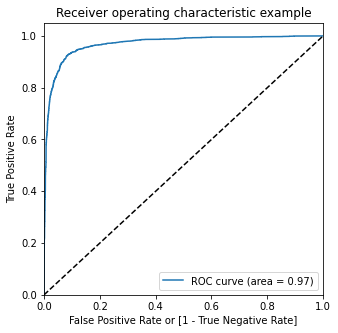

In [206]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prb)

OPTIMAL CUT-OFF (BALANCE SENSITIVITY SPECIFICITY)

In [207]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prb.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prb,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.013659,0,1,0,0,0,0,0,0,0,0,0
1,0.0,0.102171,0,1,1,0,0,0,0,0,0,0,0
2,0.0,0.004402,0,1,0,0,0,0,0,0,0,0,0
3,0.0,0.085392,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.283174,0,1,1,1,0,0,0,0,0,0,0


In [208]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.840909  0.972019  0.760120
0.2   0.2  0.893939  0.953771  0.857071
0.3   0.3  0.913420  0.937145  0.898801
0.4   0.4  0.920377  0.920114  0.920540
0.5   0.5  0.920377  0.885239  0.942029
0.6   0.6  0.913265  0.838605  0.959270
0.7   0.7  0.905071  0.801298  0.969015
0.8   0.8  0.891466  0.747770  0.980010
0.9   0.9  0.851732  0.628143  0.989505


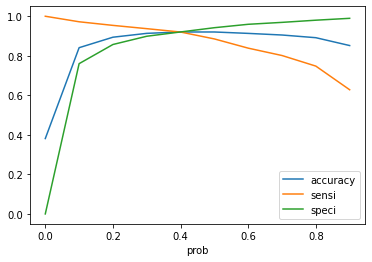

In [209]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

*CUT* OFF PROB = 0.4 FROM ABOVE CASE *italicised text*

In [251]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prb.map( lambda x: 1 if x > 0.4 else 0)
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prb*100
y_train_pred_final.head()

,Converted,Converted_Prb,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0.0,0.013659,0,1,0,0,0,0,0,0,0,0,0,0,1.365905
1,0.0,0.102171,0,1,1,0,0,0,0,0,0,0,0,0,10.217150
2,0.0,0.004402,0,1,0,0,0,0,0,0,0,0,0,0,0.440192
3,0.0,0.085392,0,1,0,0,0,0,0,0,0,0,0,0,8.539245
4,0.0,0.283174,0,1,1,1,0,0,0,0,0,0,0,0,28.317354


In [215]:

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9203772418058133

In [216]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3684,  318],
       [ 197, 2269]])

In [217]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [218]:
###SENSITIVITY 
TP/float(TP+FN)

0.9201135442011354

In [220]:
###specificity
TN/float(TN+FP)

0.9205397301349325

In [221]:
##FPR
print(FP/ float(TN+FP))

0.07946026986506746


In [222]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8770776961731735


In [223]:
# Negative predictive value
print (TN / float(TN+ FN))

0.949239886627158


PRECISION & RECALL

In [224]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3770,  232],
       [ 283, 2183]])

In [225]:
##precision 
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9039337474120083

In [226]:
##Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8852392538523925

In [227]:
from sklearn.metrics import precision_recall_curve

In [228]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
        ... 
 6463    1.0
 6464    1.0
 6465    1.0
 6466    0.0
 6467    0.0
 Name: Converted, Length: 6468, dtype: float64, 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [229]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prb)

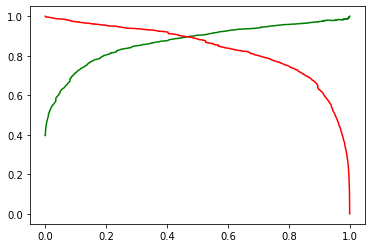

In [230]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**Prediciton** **Making**

In [231]:

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']])



In [232]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Digital Advertisement,Asymmetrique Activity Score,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_NC_EDM,Lead Source_Organic Search,Lead Source_Press_Release,Lead Source_Welingak Website,Lead Source_google,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Country_Australia,Country_France,Country_Germany,Country_Hong Kong,Country_Nigeria,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_South Africa,Country_United Arab Emirates,Country_United States,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Hospitality Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Travel and Tourism,How did you hear about X Education_Email,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,What is your current occupation_Housewife,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Shall take in the next coming month,Tags_Want to take admission but has financial problems,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,City_Other Cities,City_Other Metro Cities,City_Select,City_Tier II Cities,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
4269,0.0,0.933036,0.0,0.008674,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2376,0.0,-0.900812,0.0,0.690122,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7766,0.0,-0.793792,0.0,1.663619,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9199,0.0,-0.900812,0.0,2.637115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4359,0.0,-0.900812,0.0,0.008674,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [233]:
X_test_sm = sm.add_constant(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [234]:
y_test_pred = res.predict(X_test_sm)

In [235]:
y_pred_1 = pd.DataFrame(y_test_pred)###from array to df

In [236]:
y_pred_1.head()

,0
4269,0.786992
2376,0.988380
7766,0.795476
9199,0.705874
4359,0.828708


In [237]:
y_test_df = pd.DataFrame(y_test)

In [238]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [240]:
y_pred_final.head(9)

,Converted,0
4269,1.0,0.786992
2376,1.0,0.988380
7766,1.0,0.795476
9199,0.0,0.705874
4359,1.0,0.828708
9186,1.0,0.986340
1631,1.0,0.960565
8963,1.0,0.870097
8007,0.0,0.070378


In [241]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prb'})

In [249]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prb.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prb*100

In [250]:
y_pred_final.head()

,Converted,Converted_Prb,final_predicted,Lead_Score
4269,1.0,0.786992,1,78.699183
2376,1.0,0.988380,1,98.838010
7766,1.0,0.795476,1,79.547560
9199,0.0,0.705874,1,70.587378
4359,1.0,0.828708,1,82.870773


In [244]:
##final accuracy 
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9047619047619048

In [245]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1550,  127],
       [ 137,  958]])

In [246]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [247]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8748858447488584

In [248]:
# Let us calculate specificity
TN / float(TN+FP)

0.9242695289206917


# **correlation with target var- converted**







In [255]:
ld_data[ld_data.columns[1:]].corr()["Converted"][:].sort_values(ascending = False)


Converted                                                                  1.000000
Lead Profile_Potential Lead                                                0.378061
Total Time Spent on Website                                                0.362483
Last Notable Activity_SMS Sent                                             0.351845
Tags_Will revert after reading the email                                   0.339760
Last Activity_SMS Sent                                                     0.325600
Lead Origin_Lead Add Form                                                  0.321702
What is your current occupation_Working Professional                       0.313837
Lead Source_Reference                                                      0.270830
Tags_Closed by Horizzon                                                    0.251229
Tags_Lost to EINS                                                          0.168937
Asymmetrique Profile Score                                                 0